<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_0_8)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n20.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.213726,96.959874,0.167084,200.340685,200.118744,0.221941
1,0.0,1.0,97.344993,52.184013,-0.027742,159.501264,159.417396,0.083868
2,0.0,2.0,39.145332,65.099879,-0.116105,114.129107,114.226355,-0.097248
3,0.0,3.0,87.825931,45.194634,-0.145104,142.875461,142.913714,-0.038254
4,0.0,4.0,93.784249,42.577804,-0.002535,146.359517,146.244225,0.115292
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,52.417240,72.671736,0.015326,135.104302,135.109234,-0.004932
29996,999.0,26.0,91.135549,67.082177,0.330772,168.548498,168.218509,0.329989
29997,999.0,27.0,68.068164,96.793702,-0.098457,174.763409,174.860294,-0.096885
29998,999.0,28.0,28.364498,87.252062,0.079780,125.696340,125.643040,0.053300


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.213726,96.959874,0.167084,200.340685,200.118744,0.221941
1,0.0,1.0,97.344993,52.184013,-0.027742,159.501264,159.417396,0.083868
2,0.0,2.0,39.145332,65.099879,-0.116105,114.129107,114.226355,-0.097248
3,0.0,3.0,87.825931,45.194634,-0.145104,142.875461,142.913714,-0.038254
4,0.0,4.0,93.784249,42.577804,-0.002535,146.359517,146.244225,0.115292
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,52.417240,72.671736,0.015326,135.104302,135.109234,-0.004932
29996,999.0,26.0,91.135549,67.082177,0.330772,168.548498,168.218509,0.329989
29997,999.0,27.0,68.068164,96.793702,-0.098457,174.763409,174.860294,-0.096885
29998,999.0,28.0,28.364498,87.252062,0.079780,125.696340,125.643040,0.053300


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.213726  96.959874  0.167084  200.340685  200.118744  0.221941
      1.0    97.344993  52.184013 -0.027742  159.501264  159.417396  0.083868
      2.0    39.145332  65.099879 -0.116105  114.129107  114.226355 -0.097248
      3.0    87.825931  45.194634 -0.145104  142.875461  142.913714 -0.038254
      4.0    93.784249  42.577804 -0.002535  146.359517  146.244225  0.115292
...                ...        ...       ...         ...         ...       ...
999.0 25.0   52.417240  72.671736  0.015326  135.104302  135.109234 -0.004932
      26.0   91.135549  67.082177  0.330772  168.548498  168.218509  0.329989
      27.0   68.068164  96.793702 -0.098457  174.763409  174.860294 -0.096885
      28.0   28.364498  87.252062  0.079780  125.696340  125.643040  0.053300
      29.0   86.993862  66.346802 -0.244751  163.095913  163.344236 -0.248323

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.213726  96.959874  0.167084  200.340685  200.118744  0.221941
      1.0    97.344993  52.184013 -0.027742  159.501264  159.417396  0.083868
      2.0    39.145332  65.099879 -0.116105  114.129107  114.226355 -0.097248
      3.0    87.825931  45.194634 -0.145104  142.875461  142.913714 -0.038254
      4.0    93.784249  42.577804 -0.002535  146.359517  146.244225  0.115292
...                ...        ...       ...         ...         ...       ...
999.0 25.0   52.417240  72.671736  0.015326  135.104302  135.109234 -0.004932
      26.0   91.135549  67.082177  0.330772  168.548498  168.218509  0.329989
      27.0   68.068164  96.793702 -0.098457  174.763409  174.860294 -0.096885
      28.0   28.364498  87.252062  0.079780  125.696340  125.643040  0.053300
      29.0   86.993862  66.346802 -0.244751  163.095913  163.344236 -0.248323

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.213726,96.959874,0.167084,200.340685,200.118744,0.221941
1,0.0,1.0,97.344993,52.184013,-0.027742,159.501264,159.417396,0.083868
2,0.0,2.0,39.145332,65.099879,-0.116105,114.129107,114.226355,-0.097248
3,0.0,3.0,87.825931,45.194634,-0.145104,142.875461,142.913714,-0.038254
4,0.0,4.0,93.784249,42.577804,-0.002535,146.359517,146.244225,0.115292
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,52.417240,72.671736,0.015326,135.104302,135.109234,-0.004932
29996,999.0,26.0,91.135549,67.082177,0.330772,168.548498,168.218509,0.329989
29997,999.0,27.0,68.068164,96.793702,-0.098457,174.763409,174.860294,-0.096885
29998,999.0,28.0,28.364498,87.252062,0.079780,125.696340,125.643040,0.053300


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.213726  96.959874  0.167084  200.340685  200.118744  0.221941
      1.0    97.344993  52.184013 -0.027742  159.501264  159.417396  0.083868
      2.0    39.145332  65.099879 -0.116105  114.129107  114.226355 -0.097248
      3.0    87.825931  45.194634 -0.145104  142.875461  142.913714 -0.038254
      4.0    93.784249  42.577804 -0.002535  146.359517  146.244225  0.115292
...                ...        ...       ...         ...         ...       ...
999.0 25.0   52.417240  72.671736  0.015326  135.104302  135.109234 -0.004932
      26.0   91.135549  67.082177  0.330772  168.548498  168.218509  0.329989
      27.0   68.068164  96.793702 -0.098457  174.763409  174.860294 -0.096885
      28.0   28.364498  87.252062  0.079780  125.696340  125.643040  0.053300
      29.0   86.993862  66.346802 -0.244751  163.095913  163.344236 -0.248323

[30000 rows x 6 columns]

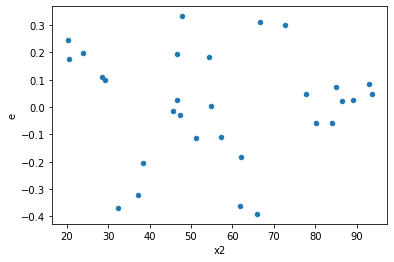

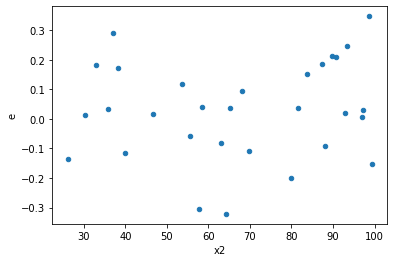

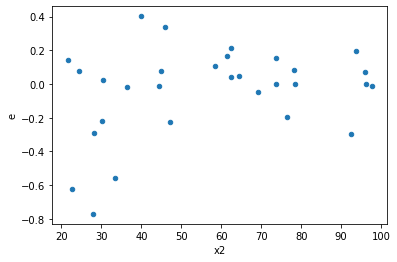

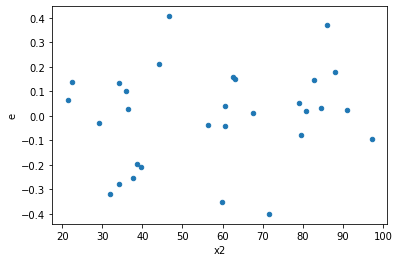

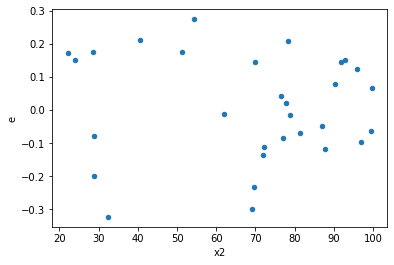

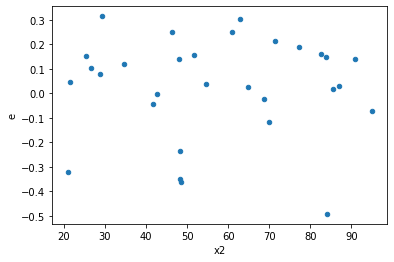

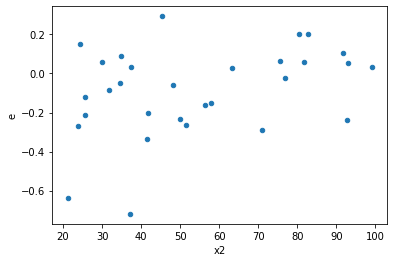

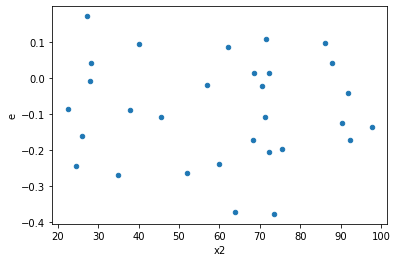

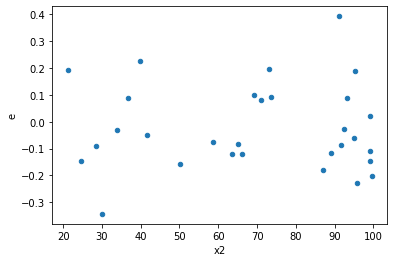

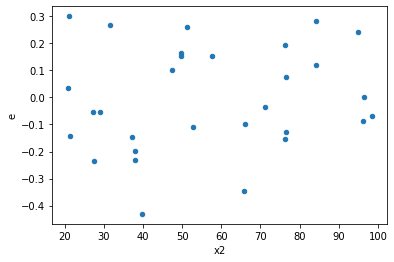

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,10.0,10.0,0.14818380890645977,0.30984125796186607,0.014818380890645976,0.030984125796186607,2.0909251843934697,0.26045208947989473,0.8697739552600526,0.13022604473994737,Reject005=1 : Homoscedasticity
5.0,10.0,10.0,0.17306155747252924,0.27414680344441567,0.017306155747252923,0.027414680344441566,1.5840999436742738,0.4799329111284414,0.7600335444357793,0.2399664555642207,Reject005=1 : Homoscedasticity
8.0,10.0,10.0,0.34733513119574444,0.5021121453622591,0.03473351311957444,0.050211214536225915,1.445612897358455,0.5708605248882312,0.7145697375558844,0.2854302624441156,Reject005=1 : Homoscedasticity
9.0,10.0,10.0,0.29788096014676685,0.36866223648830093,0.029788096014676683,0.03686622364883009,1.2376159802447928,0.7425587394548934,0.6287206302725533,0.3712793697274467,Reject005=1 : Homoscedasticity
15.0,10.0,10.0,0.5099355160827309,0.6246299215731667,0.05099355160827309,0.06246299215731667,1.2249194297575225,0.7545800563292882,0.6227099718353559,0.3772900281646441,Reject005=1 : Homoscedasticity
17.0,10.0,10.0,0.1730153890256056,0.2653233700100419,0.01730153890256056,0.026532337001004193,1.5335246853144093,0.5112064831891969,0.7443967584054015,0.25560324159459846,Reject005=1 : Homoscedasticity
22.0,10.0,10.0,0.39857112417227286,0.47686153167843026,0.03985711241722729,0.047686153167843026,1.1964276957312097,0.7822471347397095,0.6088764326301452,0.39112356736985476,Reject005=1 : Homoscedasticity
29.0,10.0,10.0,0.16510387372512508,0.3763661650400907,0.01651038737251251,0.03763661650400907,2.2795719842811675,0.20989429452535502,0.8950528527373225,0.10494714726267751,Reject005=1 : Homoscedasticity
36.0,10.0,10.0,0.3971509011594525,0.5039962563380812,0.03971509011594525,0.05039962563380812,1.2690296178774911,0.7136170514220839,0.6431914742889581,0.35680852571104194,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,0.30001793056474696,0.16139347120362618,0.030001793056474695,0.016139347120362618,0.5379460850883905,0.34270370508907017,Reject005=1 : Homoscedasticity
1.0,10.0,10.0,0.40744245448710176,0.10953404804107994,0.04074424544871018,0.010953404804107994,0.2688331734574984,0.04986842960879944,Reject005=0 : Heteroscedasticity
2.0,10.0,10.0,0.4551325418698404,0.2364215043181357,0.04551325418698404,0.023642150431813568,0.5194563837312866,0.3165905100753956,Reject005=1 : Homoscedasticity
3.0,10.0,10.0,0.14818380890645977,0.30984125796186607,0.014818380890645976,0.030984125796186607,2.0909251843934697,0.26045208947989473,Reject005=1 : Homoscedasticity
4.0,10.0,10.0,0.5346983216081417,0.3166349588811679,0.05346983216081417,0.03166349588811679,0.5921749631247516,0.4216343195286969,Reject005=1 : Homoscedasticity
5.0,10.0,10.0,0.17306155747252924,0.27414680344441567,0.017306155747252923,0.027414680344441566,1.5840999436742738,0.4799329111284414,Reject005=1 : Homoscedasticity
6.0,10.0,10.0,0.630375834935975,0.36186993512096866,0.0630375834935975,0.036186993512096866,0.5740542626570108,0.39494157623491005,Reject005=1 : Homoscedasticity
7.0,10.0,10.0,0.6276766795519044,0.3749825224909827,0.06276766795519044,0.037498252249098266,0.5974135007830481,0.42939674577117803,Reject005=1 : Homoscedasticity
8.0,10.0,10.0,0.34733513119574444,0.5021121453622591,0.03473351311957444,0.050211214536225915,1.445612897358455,0.5708605248882312,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      865
Reject005=0 : Heteroscedasticity    135
Name: Result_test, dtype: int64